# Plot cutflows

In [29]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import pandas as pd
import matplotlib.pyplot as plt
from auxPlots import interpolateData, getContours
import seaborn as sns
import numpy as np
pd.option_context('display.max_columns', -1)

pd.options.mode.chained_assignment = None #Disable copy warnings
# plt.style.use('fivethirtyeight') #Set style
# mpl.rcParams.update({'figure.figsize' : (15,10)})  #Set general plotting options
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.3)
cm = plt.colormaps['RdYlBu']

### Load ATLAS Recast Data

In [30]:
files = { 'ATLAS-SUSY-2016-08' : '../results_dataFrames/cdfo_481.38_450.00_tau_2.85e-02_atlas_2016_08_cutflow.pcl',
          'ATLAS-SUSY-2018-13 (Trackless SR)' : '../results_dataFrames/cdfo_481.38_450.00_tau_2.85e-02_atlas_2018_13_cutflow.pcl',
          'ATLAS-SUSY-2018-42 (Inclusive High SR)' : '../results_dataFrames/cdfo_808_800.0_tau_1e+00_atlas_2018_42_cutflow.pcl',
        #   'ATLAS-SUSY-2018-42' : '../results_dataFrames/cdfo_815_800.0_tau_2e-01_atlas_2018_42_cutflow.pcl',
          'CMS-EXO-20-004' : '../results_dataFrames/cdfo_481.38_450.00_tau_2.85e-02_cms_cms_exo_20_004_cutflow.pcl',
         'CMS-EXO-20-004 (LLP Veto)' : '../results_dataFrames/cdfo_481.38_450.00_tau_2.85e-02_cms_cms_exo_20_004_cutflow_llpVeto.pcl'}

recastDataDict = {label : pd.read_pickle(f) for label,f in files.items()}

### Get Model parameters

In [31]:
msb = 'mLLP'
mn1= 'mLSP'
tau = 'tau_ns'
modelDict = {label : {msb : recastData.iloc[0][msb], mn1 : recastData.iloc[0][mn1], tau : recastData.iloc[0][tau]} 
             for label,recastData in recastDataDict.items() }
title = {label: r'$m_{Y} = %1.0f$ GeV, $m_{X} = %1.0f$ GeV, $\tau = %1.2f$ ns'%(model['mLLP'],model['mLSP'],model['tau_ns'])
         for label,model in modelDict.items()}

figlabel = {label : 'msb_%1.0f_mchi_%1.0f_tau_%1.2f'%(model['mLLP'],model['mLSP'],model['tau_ns'])  for label,model in modelDict.items()}

### Fix labels

In [32]:
labelsDict = {'$nTracks >= 5$' : '$n_{\\rm trk} \geq 5$',
              '$mDV > 10$ GeV' : '$m_{DV} > 10$ GeV',
              '$MET > 200$ GeV' : '$E_T^{miss} > 200$ GeV',              
              'Triggeremulation' : 'Trigger',
              '$MET > 250$ GeV' : '$E_T^{miss} > 250$ GeV',   
              'Electronveto' : 'Electron Veto',
              'Muonveto' : 'Muon Veto',
              'Tauveto' : 'Tau Veto',
              'Bjetveto' : '$b$-jet Veto',
              'Photonveto' : 'Photon Veto',
              '$\\Delta \\phi (jet,p_{T}^{miss})>0.5$ rad' : '$\\Delta \\phi (jet,E_{T}^{miss})>0.5$ rad',
             'LeadingAK4jet$p_{T}>100$GeV' : '$p_{T}(j_1) > 100$ GeV',
             'LeadingAK4jet$\\eta<2.4$' : '$\\eta(j_1) < 2.4$' ,
             'DisplacedJet veto ($R < 2.0$)' : 'Disp. Jet veto',
             'HCALmitigation(jets)' : 'HCAL cuts (jets)',
             'HCALmitigation($\\phi^{miss}$)' : 'HCAL cuts ($\\phi^{miss}$)',
             '+Evt Eff' : '$\\times$ evt eff.',
             '+DV Eff' : '$\\times$ DV eff.',
             'final Acc*Eff' : '$\\times$ acc. $\\times$ eff.',
             "(SR-High - no mass Window)" : "Track Selection",
             "(SR-High)" : "Mass Window",
             "$n_{Charged} > 0$" : "$n_{\\rm Charged} > 0$"}


dropCuts = ['DisplacedJet veto ($R < -1.0$)','(Acceptance)',
            '$m_{T}({track},{p}_{{T}}^{{ miss}}) > 130$ GeV',
            "(SR-Low - no mass Window)", "(SR-Low)"]

### Plot cutflow for each analyses

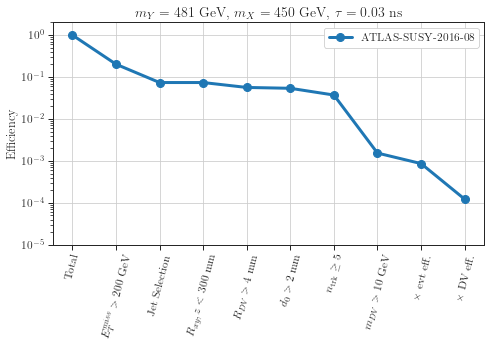

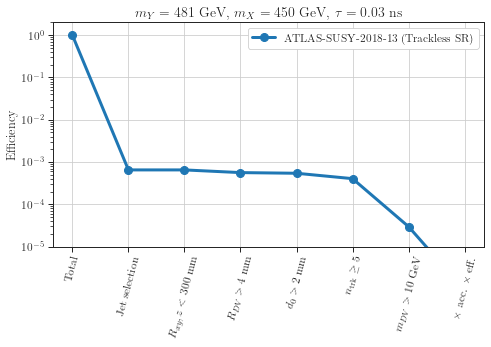

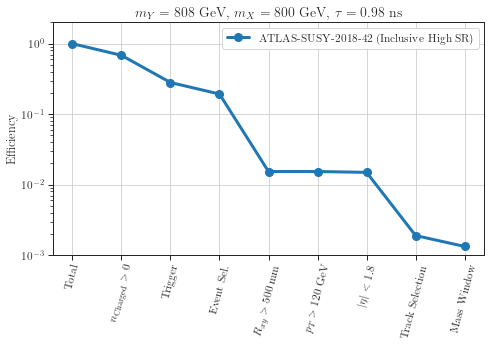

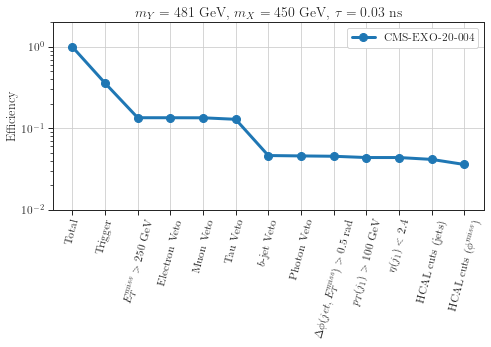

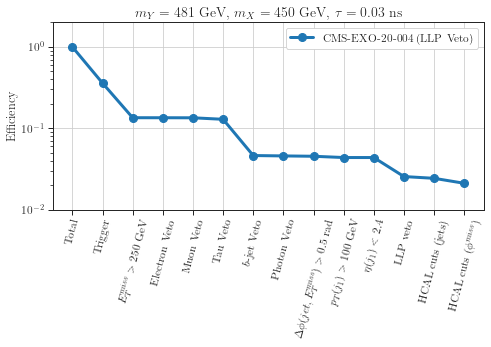

In [33]:
for label,recastData in recastDataDict.items():

    recastData = recastData.drop(columns=dropCuts,errors='ignore')
    fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(7,5))
    x_ticks = [r'%s'%c for c in recastData.columns]
    x_ticks = x_ticks[x_ticks.index('Total'):]
    x_ticksL = [labelsDict[xl] if xl in labelsDict else xl for xl in x_ticks[:]] 
    x = np.arange(0.,len(x_ticksL),1.)
    ax.set_xticks(x, x_ticksL,rotation=75)
    y = recastData.iloc[0][x_ticks]
    yerr = [v[1] for v in y[:]]
    y = [v[0] for v in y[:]]
    p = ax.plot(x,y,label=label,linewidth=3,marker='o',markersize=8)
    ax.set_yscale('log')
    ax.set_ylabel('Efficiency')
    if 'CMS' in label:
        ax.set_ylim(1e-2,2.)
        ax.set_yticks([1e-2,1e-1,1.])
    elif '2018-42' in label:
        ax.set_ylim(1e-3,2.)
        ax.set_yticks([1e-3,1e-2,1e-1,1.])
    else:
        ax.set_ylim(1e-5,2.)
        ax.set_yticks([1e-5,1e-4,1e-3,1e-2,1e-1,1.])

    ax.set_title(title[label],fontsize=14)
    ax.legend(framealpha=1.0)    
    ax.grid()
    plt.tight_layout()
    plt.savefig('cutflows_%s_%s.png' %(label,figlabel[label]))
    plt.show()